In [661]:
import pandas as pd
import datetime

In [662]:
today = datetime.date(2020,9,4)

In [663]:
today

datetime.date(2020, 9, 4)

In [664]:
type(today)

datetime.date

In [665]:
today.year

2020

In [666]:
month_start = datetime.date(today.year,today.month,1)

In [667]:
datetime.date(today.year,today.month+1,1)

datetime.date(2020, 10, 1)

In [668]:
from datetime import timedelta

In [669]:
month_end = datetime.date(today.year,today.month+1,1) - timedelta(days=1)

In [670]:
import_file = "sample_auto03.xlsx"

In [671]:
excel_sheetname01 = "201909"
excel_sheetname02 = "202009"

In [672]:
df_201909 = pd.read_excel(import_file,sheet_name = excel_sheetname01,index_col="date")
df_201909.head()

,sales,cost
date,,
2019-08-30,370193.0,10000
2019-08-31,604558.0,11000
2019-09-01,451000.0,3500
2019-09-02,313000.0,8000
2019-09-03,298000.0,9000


In [673]:
import pandas.tseries.offsets as offsets

In [674]:
df_201909["next_year"] = df_201909.index + offsets.Day(364)

In [675]:
df_201909.head(10)

,sales,cost,next_year
date,,,
2019-08-30,370193.0,10000,2020-08-28
2019-08-31,604558.0,11000,2020-08-29
2019-09-01,451000.0,3500,2020-08-30
2019-09-02,313000.0,8000,2020-08-31
2019-09-03,298000.0,9000,2020-09-01
2019-09-04,310000.0,11000,2020-09-02
2019-09-05,290000.0,8000,2020-09-03
2019-09-06,369000.0,11000,2020-09-04
2019-09-07,602000.0,12000,2020-09-05


In [676]:
df_201909 = df_201909.drop(["cost"],axis=1)

In [677]:
df_201909.head()

,sales,next_year
date,,
2019-08-30,370193.0,2020-08-28
2019-08-31,604558.0,2020-08-29
2019-09-01,451000.0,2020-08-30
2019-09-02,313000.0,2020-08-31
2019-09-03,298000.0,2020-09-01


In [678]:
df_202009 = pd.read_excel(import_file,sheet_name = excel_sheetname02,index_col="date")
df_202009.head()

,sales,cost
date,,
2020-08-25,254364.0,1000.0
2020-08-26,286343.0,1000.0
2020-08-27,265857.0,1000.0
2020-08-28,302279.0,1000.0
2020-08-29,558500.0,1000.0


In [679]:
df_this_year = pd.merge(df_201909,df_202009,left_on = "next_year",right_index = True,how = "right")
df_this_year

,sales_x,next_year,sales_y,cost
NaT,NaN,2020-08-25,254364.0,1000.0
NaT,NaN,2020-08-26,286343.0,1000.0
NaT,NaN,2020-08-27,265857.0,1000.0
2019-08-30,370193.0,2020-08-28,302279.0,1000.0
2019-08-31,604558.0,2020-08-29,558500.0,1000.0
2019-09-01,451000.0,2020-08-30,588152.0,1000.0
2019-09-02,313000.0,2020-08-31,281777.0,1000.0
2019-09-03,298000.0,2020-09-01,249000.0,1000.0
2019-09-04,310000.0,2020-09-02,286000.0,1000.0
2019-09-05,290000.0,2020-09-03,265000.0,1000.0


In [680]:
#df_this_year = pd.merge(df_201909,df_202009,left_on = "next_year",right_index = True,how = "left")

In [681]:
df_this_year = df_this_year.rename(columns = {"sales_x":"last year sales","sales_y":"this year sales","next_year":"date"})
df_this_year

,last year sales,date,this year sales,cost
NaT,NaN,2020-08-25,254364.0,1000.0
NaT,NaN,2020-08-26,286343.0,1000.0
NaT,NaN,2020-08-27,265857.0,1000.0
2019-08-30,370193.0,2020-08-28,302279.0,1000.0
2019-08-31,604558.0,2020-08-29,558500.0,1000.0
2019-09-01,451000.0,2020-08-30,588152.0,1000.0
2019-09-02,313000.0,2020-08-31,281777.0,1000.0
2019-09-03,298000.0,2020-09-01,249000.0,1000.0
2019-09-04,310000.0,2020-09-02,286000.0,1000.0
2019-09-05,290000.0,2020-09-03,265000.0,1000.0


In [682]:
len(df_this_year)

37

In [683]:
df_this_year.index

DatetimeIndex([       'NaT',        'NaT',        'NaT', '2019-08-30',
               '2019-08-31', '2019-09-01', '2019-09-02', '2019-09-03',
               '2019-09-04', '2019-09-05', '2019-09-06', '2019-09-07',
               '2019-09-08', '2019-09-09', '2019-09-10', '2019-09-11',
               '2019-09-12', '2019-09-13', '2019-09-14', '2019-09-15',
               '2019-09-16', '2019-09-17', '2019-09-18', '2019-09-19',
               '2019-09-20', '2019-09-21', '2019-09-22', '2019-09-23',
               '2019-09-24', '2019-09-25', '2019-09-26', '2019-09-27',
               '2019-09-28', '2019-09-29', '2019-09-30',        'NaT',
                      'NaT'],
              dtype='datetime64[ns]', freq=None)

In [684]:
df_this_year.isnull().sum()

last year sales     5
date                0
this year sales    17
cost               17
dtype: int64

In [685]:
df_this_year = df_this_year.sort_index()
df_this_year

,last year sales,date,this year sales,cost
2019-08-30,370193.0,2020-08-28,302279.0,1000.0
2019-08-31,604558.0,2020-08-29,558500.0,1000.0
2019-09-01,451000.0,2020-08-30,588152.0,1000.0
2019-09-02,313000.0,2020-08-31,281777.0,1000.0
2019-09-03,298000.0,2020-09-01,249000.0,1000.0
2019-09-04,310000.0,2020-09-02,286000.0,1000.0
2019-09-05,290000.0,2020-09-03,265000.0,1000.0
2019-09-06,369000.0,2020-09-04,301000.0,1000.0
2019-09-07,602000.0,2020-09-05,502000.0,1000.0
2019-09-08,655000.0,2020-09-06,568000.0,1000.0


In [686]:
df_this_year = df_this_year.set_index("date")

In [687]:
df_this_year["last per year"] = df_this_year["this year sales"]/ df_this_year["last year sales"]
df_this_year

,last year sales,this year sales,cost,last per year
date,,,,
2020-08-28,370193.0,302279.0,1000.0,0.816544
2020-08-29,604558.0,558500.0,1000.0,0.923815
2020-08-30,451000.0,588152.0,1000.0,1.304106
2020-08-31,313000.0,281777.0,1000.0,0.900246
2020-09-01,298000.0,249000.0,1000.0,0.835570
2020-09-02,310000.0,286000.0,1000.0,0.922581
2020-09-03,290000.0,265000.0,1000.0,0.913793
2020-09-04,369000.0,301000.0,1000.0,0.815718
2020-09-05,602000.0,502000.0,1000.0,0.833887


In [688]:
df_this_year["this year sales"]

date
2020-08-28    302279.0
2020-08-29    558500.0
2020-08-30    588152.0
2020-08-31    281777.0
2020-09-01    249000.0
2020-09-02    286000.0
2020-09-03    265000.0
2020-09-04    301000.0
2020-09-05    502000.0
2020-09-06    568000.0
2020-09-07    268000.0
2020-09-08    248000.0
2020-09-09    279000.0
2020-09-10    250000.0
2020-09-11    321000.0
2020-09-12    511000.0
2020-09-13    583000.0
2020-09-14         NaN
2020-09-15         NaN
2020-09-16         NaN
2020-09-17         NaN
2020-09-18         NaN
2020-09-19         NaN
2020-09-20         NaN
2020-09-21         NaN
2020-09-22         NaN
2020-09-23         NaN
2020-09-24         NaN
2020-09-25         NaN
2020-09-26         NaN
2020-09-27         NaN
2020-09-28         NaN
2020-08-25    254364.0
2020-08-26    286343.0
2020-08-27    265857.0
2020-09-29         NaN
2020-09-30         NaN
Name: this year sales, dtype: float64

In [689]:
df_this_year["last week sales"] = df_this_year["this year sales"].shift(7)
df_this_year.head()

,last year sales,this year sales,cost,last per year,last week sales
date,,,,,
2020-08-28,370193.0,302279.0,1000.0,0.816544,NaN
2020-08-29,604558.0,558500.0,1000.0,0.923815,NaN
2020-08-30,451000.0,588152.0,1000.0,1.304106,NaN
2020-08-31,313000.0,281777.0,1000.0,0.900246,NaN
2020-09-01,298000.0,249000.0,1000.0,0.835570,NaN


In [690]:
df_this_year["last week per"] = df_this_year["this year sales"]/df_this_year["last week sales"]
df_this_year

,last year sales,this year sales,cost,last per year,last week sales,last week per
date,,,,,,
2020-08-28,370193.0,302279.0,1000.0,0.816544,NaN,NaN
2020-08-29,604558.0,558500.0,1000.0,0.923815,NaN,NaN
2020-08-30,451000.0,588152.0,1000.0,1.304106,NaN,NaN
2020-08-31,313000.0,281777.0,1000.0,0.900246,NaN,NaN
2020-09-01,298000.0,249000.0,1000.0,0.835570,NaN,NaN
2020-09-02,310000.0,286000.0,1000.0,0.922581,NaN,NaN
2020-09-03,290000.0,265000.0,1000.0,0.913793,NaN,NaN
2020-09-04,369000.0,301000.0,1000.0,0.815718,302279.0,0.995769
2020-09-05,602000.0,502000.0,1000.0,0.833887,558500.0,0.898836


In [691]:
#df_this_year.index >= today
df_this_year.index >= pd.to_datetime(today)

array([False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True])

In [692]:
(df_this_year.index >= pd.to_datetime(month_start)) & (df_this_year.index >= pd.to_datetime(today))

array([False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True])

In [696]:
df_this_year = df_this_year[(df_this_year.index <= pd.to_datetime("2020-09-13")) & (df_this_year.index >= pd.to_datetime(today))]
df_this_year

,last year sales,this year sales,cost,last per year,last week sales,last week per
date,,,,,,
2020-09-04,369000.0,301000.0,1000.0,0.815718,302279.0,0.995769
2020-09-05,602000.0,502000.0,1000.0,0.833887,558500.0,0.898836
2020-09-06,655000.0,568000.0,1000.0,0.867176,588152.0,0.965737
2020-09-07,287000.0,268000.0,1000.0,0.933798,281777.0,0.951107
2020-09-08,268000.0,248000.0,1500.0,0.925373,249000.0,0.995984
2020-09-09,243000.0,279000.0,1500.0,1.148148,286000.0,0.975524
2020-09-10,251000.0,250000.0,1500.0,0.996016,265000.0,0.943396
2020-09-11,276000.0,321000.0,1500.0,1.163043,301000.0,1.066445
2020-09-12,420700.0,511000.0,1500.0,1.214642,502000.0,1.017928


In [697]:
import matplotlib.pyplot as plt
%matplotlib inline

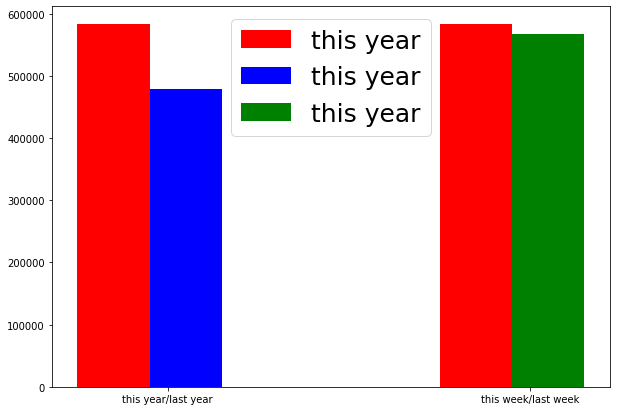

In [720]:
plt.figure(figsize=(10,7))

x1 = [1,2]
y1 = [df_this_year.loc["2020-09-13","this year sales"],df_this_year.loc["2020-9-13","this year sales"]]

x2 = [1.2]
y2 = [df_this_year.loc["2020-09-13","last year sales"]]

x3 = [2.2]
y3 = [df_this_year.loc["2020-09-13","last week sales"]]

plt.bar(x1,y1,color="red",label="this year",width=0.2,align="center")
plt.bar(x2,y2,color="blue",label="this year",width=0.2,align="center")
plt.bar(x3,y3,color="green",label="this year",width=0.2,align="center")

label_x = ["this year/last year","this week/last week"]
plt.xticks([1.15,2.15],label_x)

plt.legend(fontsize=25,loc="upper center")
plt.savefig("graph01.png",dpi=60)


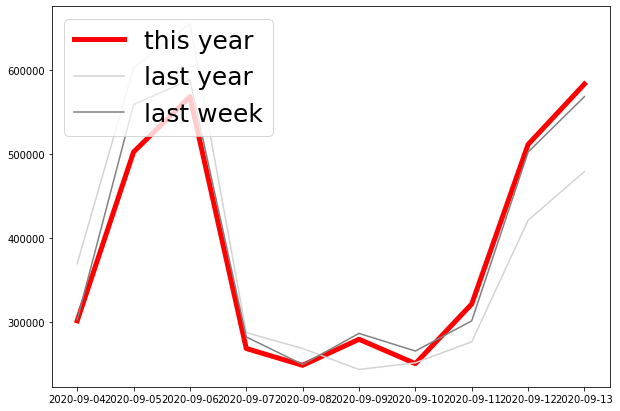

In [722]:
plt.figure(figsize=(10,7))

p = df_this_year.index
y1 = df_this_year["this year sales"]
y2 = df_this_year["last year sales"]
y3 = df_this_year["last week sales"]

plt.plot(p,y1,color="red",label="this year",linewidth="5")
plt.plot(p,y2,color="lightgrey",label="last year")
plt.plot(p,y3,color="grey",label="last week")

plt.legend(fontsize=25,loc="upper left")

plt.savefig("graph02.png",dpi=60)

In [741]:
df_201909 = pd.read_excel(import_file,sheet_name = excel_sheetname01,index_col="date")
df_202009 = pd.read_excel(import_file,sheet_name = excel_sheetname02,index_col="date")


In [742]:
df_concat = pd.concat([df_201909,df_202009])

In [743]:
df_concat.head()

,sales,cost
date,,
2019-08-30,370193.0,10000.0
2019-08-31,604558.0,11000.0
2019-09-01,451000.0,3500.0
2019-09-02,313000.0,8000.0
2019-09-03,298000.0,9000.0


In [744]:
df_concat["weekly_name"] = df_concat.index.day_name()

In [745]:
df_concat

,sales,cost,weekly_name
date,,,
2019-08-30,370193.0,10000.0,Friday
2019-08-31,604558.0,11000.0,Saturday
2019-09-01,451000.0,3500.0,Sunday
2019-09-02,313000.0,8000.0,Monday
2019-09-03,298000.0,9000.0,Tuesday
...,...,...,...
2020-09-26,NaN,NaN,Saturday
2020-09-27,NaN,NaN,Sunday
2020-09-28,NaN,NaN,Monday


In [748]:
df_concat = df_concat.dropna()
df_concat.head()

,sales,cost,weekly_name
date,,,
2019-08-30,370193.0,10000.0,Friday
2019-08-31,604558.0,11000.0,Saturday
2019-09-01,451000.0,3500.0,Sunday
2019-09-02,313000.0,8000.0,Monday
2019-09-03,298000.0,9000.0,Tuesday


In [752]:
df_201909_weekname = df_concat[["sales","cost","weekly_name"]].groupby("weekly_name").mean()
df_201909_weekname

,sales,cost
weekly_name,,
Friday,325759.000000,5687.500000
Monday,310111.000000,2642.857143
Saturday,539694.750000,6125.000000
Sunday,569869.000000,5500.000000
Thursday,258122.428571,2357.142857
Tuesday,260909.142857,2642.857143
Wednesday,265906.142857,2500.000000


<BarContainer object of 7 artists>

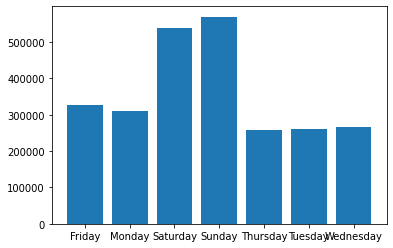

In [753]:
plt.bar(df_201909_weekname.index,df_201909_weekname["sales"])

In [754]:
import seaborn as sns

<AxesSubplot:xlabel='cost', ylabel='sales'>

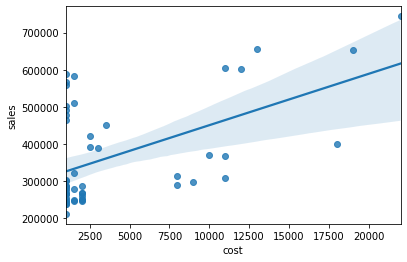

In [757]:
sns.regplot(x=df_concat["cost"],y=df_concat["sales"],data=df_concat)